Capstone 2022 - 2023
Written by James Hinkle and Patrick McCool

In [198]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [255]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [200]:
crime = pd.read_csv("violenceprojectfulldatabase.csv", sep=",")

In [201]:
crime.head()

,Case #,Perpetrator Name,Unnamed: 2,Date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Location,Unnamed: 9,...,Weapons,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Resolution of Case,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142
0,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Shooting Location Address,City,...,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence,NaN
1,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,"110 Inner Campus Drive, Austin, TX 78705",Austin,...,1,3,7,1,"hatchet, hammer, knives, wrench, ropes, water,...",1,0,2,0,NaN
2,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,"Rose-Mar College of Beauty in Mesa, AZ",Mesa,...,0,1,1,1,"knife, nylon cord",2,0,1,1,NaN
3,3,Held,Leo,10/23/1967,Monday,23,10,1967,"599 South Highland Street Lockhaven, PA 17745",Lock Haven,...,1,3,2,1,holster,1,0,2,0,NaN
4,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,"11703 Lake Rd, Ironwood, MI 49938",Ironwood,...,0,0,1,0,NaN,2,0,0,3,NaN


In [202]:
crime.shape

(352, 143)

The header is first row for some reason, have to fix this

In [203]:
crime.columns = crime.iloc[0] #Make the first row the header
crime = crime.iloc[1:, :] #Drop the first row

In [204]:
crime.head()

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Shooting Location Address,City,...,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence,NaN
1,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,"110 Inner Campus Drive, Austin, TX 78705",Austin,...,1,3,7,1,"hatchet, hammer, knives, wrench, ropes, water,...",1,0,2,0,NaN
2,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,"Rose-Mar College of Beauty in Mesa, AZ",Mesa,...,0,1,1,1,"knife, nylon cord",2,0,1,1,NaN
3,3,Held,Leo,10/23/1967,Monday,23,10,1967,"599 South Highland Street Lockhaven, PA 17745",Lock Haven,...,1,3,2,1,holster,1,0,2,0,NaN
4,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,"11703 Lake Rd, Ironwood, MI 49938",Ironwood,...,0,0,1,0,NaN,2,0,0,3,NaN
5,5,Lambright,Donald,4/5/1969,Saturday,5,4,1969,"Pennsylvania Turnpike near Harrisburg, PA",Harrisburg,...,0,3,2,0,NaN,0,0,2,0,NaN


In [205]:
col = crime.columns.tolist()
print(col)

['Case #', 'Shooter Last Name', 'Shooter First Name', 'Full Date', 'Day of Week', 'Day', 'Month', 'Year', 'Shooting Location Address', 'City', 'State', 'State Code', 'Region', 'Urban/Suburban/Rural', 'Location', 'Insider / Outsider', 'Workplace shooting', 'Multiple Locations', 'Other Location', 'Armed Person on Scene', 'Specify Armed Person', 'Number Killed', 'Number Injured', 'Family Member Victim', 'Romantic Partner Victim', 'Kidnapping or Hostage Situation', 'Age', 'Gender', 'Race', 'Immigrant', 'Sexual Orientation', 'Religion', 'Education', 'School Performance', 'School Performance Specified', 'Birth Order', 'Number of Siblings', 'Older Siblings', 'Younger Siblings', 'Relationship Status', 'Children', 'Employment Status', 'Employment Type\xa0', 'Military Service', 'Military Branch', 'Community Involvement', 'Community Involvement Specified', 'Known to Police or FBI', 'Criminal Record', 'Part I Crimes', 'Part II Crimes', 'Highest Level of Criminal Justice Involvement', 'History of P

In [206]:
crime = crime.loc[:, crime.columns.notna()] #Drop columns labeled as NAN

In [207]:
crime.shape

(351, 142)

In [208]:
pd.set_option('display.max_rows', 1000)

In [209]:
navalues = crime.isna().sum()
#print(navalues) #see which columns have the most NA
cloudcrime = crime.copy()

Drop the columns with the majority NAN

In [210]:
crime.drop(['Military Branch','Specify Other Weapons or Gear', 'Health Issues - Specify','Specify Pop Culture Connection', 'Psychiatric Medication Specified','Community Involvement Specified'], axis = 'columns', inplace = True )

In [211]:
crime.head()

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Shooting Location Address,City,...,Planning,Performance,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence
1,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,"110 Inner Campus Drive, Austin, TX 78705",Austin,...,1,0,1,3,7,1,1,0,2,0
2,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,"Rose-Mar College of Beauty in Mesa, AZ",Mesa,...,1,1,0,1,1,1,2,0,1,1
3,3,Held,Leo,10/23/1967,Monday,23,10,1967,"599 South Highland Street Lockhaven, PA 17745",Lock Haven,...,0,0,1,3,2,1,1,0,2,0
4,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,"11703 Lake Rd, Ironwood, MI 49938",Ironwood,...,0,0,0,0,1,0,2,0,0,3
5,5,Lambright,Donald,4/5/1969,Saturday,5,4,1969,"Pennsylvania Turnpike near Harrisburg, PA",Harrisburg,...,0,0,0,3,2,0,0,0,2,0


In [212]:
crime.shape

(351, 136)

In [213]:
result = crime.dtypes
#print(result)

In [214]:
crime.convert_dtypes()
pd.to_numeric(crime["Autism Spectrum"], errors='coerce')
crime["Autism Spectrum"] = pd.to_numeric(crime["Autism Spectrum"], errors='coerce').convert_dtypes() 

In [215]:
result = crime.dtypes
#print(result)

In [216]:
crime2 = crime[crime['Autism Spectrum'].notna()]

In [217]:
crime['Autism Spectrum'] = crime['Autism Spectrum'].replace("0", "No Evidence")
crime['Autism Spectrum'] = crime['Autism Spectrum'].replace("1", "Autism")

autismPresent = crime[crime['Autism Spectrum'].notna()]
a = (autismPresent['Autism Spectrum']=="No Evidence").sum()
b = (autismPresent['Autism Spectrum']=="Autism").sum()

c:\Users\funny\anaconda3\lib\site-packages\pandas\core\missing.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [218]:
autismPresent = crime[crime['Autism Spectrum'].notna()]
a = (autismPresent['Autism Spectrum']=="No Evidence").sum()
b = (autismPresent['Autism Spectrum']=="Autism").sum()

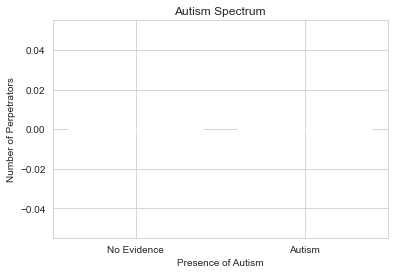

In [219]:
x = autismPresent["Autism Spectrum"]
y = a, b
dictautism = {'No Evidence':a, 'Autism':b}
plt.bar(list(dictautism.keys()),list(dictautism.values()) )
plt.title("Autism Spectrum")

plt.ylabel("Number of Perpetrators")
plt.xlabel("Presence of Autism")
plt.show()

In [220]:
#crime["Mental Illness"] = pd.to_numeric(crime["Mental Illness"], errors='coerce').convert_dtypes() 
#print(crime["Mental Illness"])

In [221]:
crime2 = crime[crime['Mental Illness'].notna()]

Research Question 1 - Do they have mental health issues?

In [222]:
crime['Mental Illness'].head()

1    1
2    2
3    4
4    0
5    2
Name: Mental Illness, dtype: object

In [223]:
"""
crime['Mental Illness'] = crime['Mental Illness'].replace("0", "No Evidence")
crime['Mental Illness'] = crime['Mental Illness'].replace("1", "Mood Disorder")
crime['Mental Illness'] = crime['Mental Illness'].replace("2", "Thought Disorder")
crime['Mental Illness'] = crime['Mental Illness'].replace("3", "Other Disorder")
crime['Mental Illness'] = crime['Mental Illness'].replace("4", "Indication, but no disagnosis")
crime['Mental Illness']
"""

'\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("0", "No Evidence")\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("1", "Mood Disorder")\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("2", "Thought Disorder")\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("3", "Other Disorder")\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("4", "Indication, but no disagnosis")\ncrime[\'Mental Illness\']\n'

In [224]:
mentalhealth = crime[crime['Mental Illness'].notna()]
a =(mentalhealth['Mental Illness']=="0").sum()
b = (mentalhealth['Mental Illness']=="1").sum()
c = (mentalhealth['Mental Illness']=="2").sum()
d = (mentalhealth['Mental Illness']=="3").sum()
e = (mentalhealth['Mental Illness']=="4").sum()
illnesslist = (a,b,c,d,e)

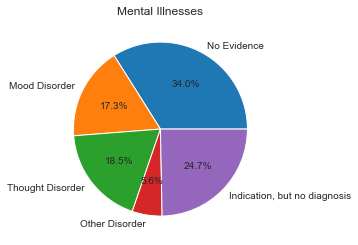

In [225]:
#Pie Chart for Mental Illness in perpetrators
x = mentalhealth["Mental Illness"]
mentalhealthlabels = ["No Evidence","Mood Disorder","Thought Disorder","Other Disorder","Indication, but no diagnosis"]
plt.pie(illnesslist, labels = mentalhealthlabels, autopct='%1.1f%%')
plt.title("Mental Illnesses")
#plt.legend(loc="lower right")
plt.show()

In [226]:
crime['Relationship Status'] = crime['Relationship Status'].replace("0", "Single")
crime['Relationship Status'] = crime['Relationship Status'].replace("1", "Dating")
crime['Relationship Status'] = crime['Relationship Status'].replace("2", "Married")
crime['Relationship Status'] = crime['Relationship Status'].replace("3", "Widowed")

In [227]:
single = (crime['Relationship Status']=="Single").sum()
dating = (crime['Relationship Status']=="Dating").sum()
married = (crime['Relationship Status']=="Married").sum()
widowed = (crime['Relationship Status']=="Widowed").sum()

Add percent or pie chart as well

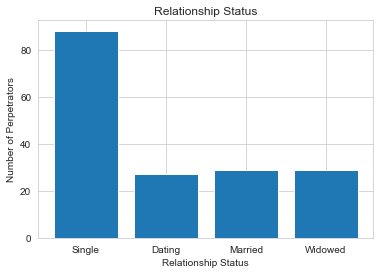

In [228]:
crime2 = crime[crime['Relationship Status'].notna()]
x = crime2["Relationship Status"]
y = single,dating,married,widowed
dict = {'Single':single, 'Dating':dating,'Married':married,'Widowed':widowed}
plt.bar(list(dict.keys()),list(dict.values()) )
plt.title("Relationship Status")
plt.ylabel("Number of Perpetrators")
plt.xlabel("Relationship Status")
plt.show()

Do the shooters use social media?

In [229]:
crime.columns.tolist()

['Case #',
 'Shooter Last Name',
 'Shooter First Name',
 'Full Date',
 'Day of Week',
 'Day',
 'Month',
 'Year',
 'Shooting Location Address',
 'City',
 'State',
 'State Code',
 'Region',
 'Urban/Suburban/Rural',
 'Location',
 'Insider / Outsider',
 'Workplace shooting',
 'Multiple Locations',
 'Other Location',
 'Armed Person on Scene',
 'Specify Armed Person',
 'Number Killed',
 'Number Injured',
 'Family Member Victim',
 'Romantic Partner Victim',
 'Kidnapping or Hostage Situation',
 'Age',
 'Gender',
 'Race',
 'Immigrant',
 'Sexual Orientation',
 'Religion',
 'Education',
 'School Performance',
 'School Performance Specified',
 'Birth Order',
 'Number of Siblings',
 'Older Siblings',
 'Younger Siblings',
 'Relationship Status',
 'Children',
 'Employment Status',
 'Employment Type\xa0',
 'Military Service',
 'Community Involvement',
 'Known to Police or FBI',
 'Criminal Record',
 'Part I Crimes',
 'Part II Crimes',
 'Highest Level of Criminal Justice Involvement',
 'History of Physi

In [230]:
crime3 = crime.rename(columns ={'Social Media Use\xa0': 'Social Media Use'})

In [231]:
crime3.head()

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Shooting Location Address,City,...,Planning,Performance,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence
1,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,"110 Inner Campus Drive, Austin, TX 78705",Austin,...,1,0,1,3,7,1,1,0,2,0
2,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,"Rose-Mar College of Beauty in Mesa, AZ",Mesa,...,1,1,0,1,1,1,2,0,1,1
3,3,Held,Leo,10/23/1967,Monday,23,10,1967,"599 South Highland Street Lockhaven, PA 17745",Lock Haven,...,0,0,1,3,2,1,1,0,2,0
4,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,"11703 Lake Rd, Ironwood, MI 49938",Ironwood,...,0,0,0,0,1,0,2,0,0,3
5,5,Lambright,Donald,4/5/1969,Saturday,5,4,1969,"Pennsylvania Turnpike near Harrisburg, PA",Harrisburg,...,0,0,0,3,2,0,0,0,2,0


In [232]:
crime3.columns.tolist()

['Case #',
 'Shooter Last Name',
 'Shooter First Name',
 'Full Date',
 'Day of Week',
 'Day',
 'Month',
 'Year',
 'Shooting Location Address',
 'City',
 'State',
 'State Code',
 'Region',
 'Urban/Suburban/Rural',
 'Location',
 'Insider / Outsider',
 'Workplace shooting',
 'Multiple Locations',
 'Other Location',
 'Armed Person on Scene',
 'Specify Armed Person',
 'Number Killed',
 'Number Injured',
 'Family Member Victim',
 'Romantic Partner Victim',
 'Kidnapping or Hostage Situation',
 'Age',
 'Gender',
 'Race',
 'Immigrant',
 'Sexual Orientation',
 'Religion',
 'Education',
 'School Performance',
 'School Performance Specified',
 'Birth Order',
 'Number of Siblings',
 'Older Siblings',
 'Younger Siblings',
 'Relationship Status',
 'Children',
 'Employment Status',
 'Employment Type\xa0',
 'Military Service',
 'Community Involvement',
 'Known to Police or FBI',
 'Criminal Record',
 'Part I Crimes',
 'Part II Crimes',
 'Highest Level of Criminal Justice Involvement',
 'History of Physi

In [233]:
crime3['Year'] = pd.to_numeric(crime3['Year'])

In [234]:
before2010 = crime3[(crime3['Year'] <= 2010) & (crime3['Year'] >= 2000)]
after2010 = crime3[(crime3['Year'] > 2010)]
before1999 = crime3[(crime3['Year'] < 2000)]

In [235]:
before2010none = (before2010['Social Media Use']=="0").sum()
before2010yes = (before2010['Social Media Use']=="1").sum()
after2010none = (after2010['Social Media Use']=="0").sum()
after2010yes = (after2010['Social Media Use']=="1").sum()
before1999no = (before1999['Social Media Use']=="2").sum()

In [236]:
'''
nosocialmedia = (crime3['Social Media Use']=="0" & crime3['Year'] < 2010 & crime3['Year']>=2000).sum()
socialmediause = (crime3['Social Media Use']=="1").sum()
notvalid = (crime3['Social Media Use']=="2").sum()
'''


'\nnosocialmedia = (crime3[\'Social Media Use\']=="0" & crime3[\'Year\'] < 2010 & crime3[\'Year\']>=2000).sum()\nsocialmediause = (crime3[\'Social Media Use\']=="1").sum()\nnotvalid = (crime3[\'Social Media Use\']=="2").sum()\n'

Seaborn group bar chart for before 2010 and after 2010

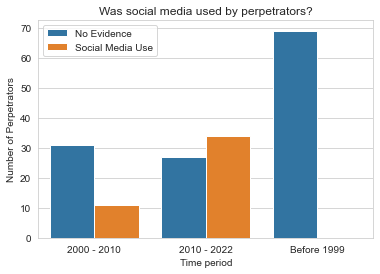

In [237]:
socialmediagrouped = {'Group': ['2000 - 2010', '2000 - 2010', '2010 - 2022', '2010 - 2022', 'Before 1999'], 
        'Category': ['No Evidence', 'Social Media Use', 'No Evidence', 'Social Media Use', 'No Evidence'], 
        'Value': [before2010none, before2010yes, after2010none, after2010yes, before1999no]}
# Create the grouped bar chart using Seaborn
sns.set_style("whitegrid")
sns.barplot(x="Group", y="Value", hue="Category", data=socialmediagrouped)

# Add titles and labels
plt.title('Was social media used by perpetrators?')
plt.xlabel('Time period')
plt.ylabel('Number of Perpetrators')

#pct = ((before2010none/351)*100, (before2010yes/351)*100, (after2010none/351)*100, (after2010yes/351)*100, (before1999no/351)*100)
#1 = sns.barplot(np.arange(len(pct)),pct)
# Show the chart
plt.show()

In [238]:
'''
socialmedia = {'No Evidence': nosocialmedia, 'Social Media Use':socialmediause, 'Before 1999':notvalid}
plt.bar(list(socialmedia.keys()),list(socialmedia.values()))
plt.xticks(rotation=45)
plt.title("Did the shooters use social media?")
plt.show()
'''

'\nsocialmedia = {\'No Evidence\': nosocialmedia, \'Social Media Use\':socialmediause, \'Before 1999\':notvalid}\nplt.bar(list(socialmedia.keys()),list(socialmedia.values()))\nplt.xticks(rotation=45)\nplt.title("Did the shooters use social media?")\nplt.show()\n'

In [239]:
crime3['School Performance Specified'] =crime3['School Performance Specified'].astype(str)
wordcloud1 = crime3['School Performance Specified'].tolist()
print(wordcloud1)

['1.9 GPA', 'good grades, on student council', 'nan', 'nan', 'brilliant, attended several colleges', "completed university with a scholarship, master's degree", 'average grades, failed a lot of courses', 'nan', 'average', 'nan', 'nan', 'brillant, top quarter of his class', 'honor student', 'nan', 'nan', 'nan', 'PhD', 'unsuccessful in college', 'nan', 'nan', 'flunking out, but very intelligent', 'nan', 'teaching degree, assumed good grades', 'nan', 'computer programmer at Stanford, assumed good grades', 'high school dropout', 'nan', 'very poor student', '51st out of 77 in high school, failed at least one course', 'nan', 'nan', 'barely passable grades, went to college on a wrestling scholarship and dropped out after a year', "master's degree", 'very good grades, graduated 61st out of 520', 'nan', 'nan', 'able to pass classes but unable to retain information, repeated 5th grade, dropped out of school at age 14', 'poor student, dropped out in 9th grade', 'nan', 'nan', 'nan', 'PhD candidate

In [240]:
testStr = '1.9 GPA good grades on student council   brilliant attended several colleges "completed university with a scholarship masters degree" average grades failed a lot of courses  average   brillant top quarter of his class honor student    PhD unsuccessful in college   flunking out but very intelligent  teaching degree assumed good grades  computer programmer at Stanford assumed good grades high school dropout  very poor student 51st out of 77 in high school failed at least one course   barely passable grades went to college on a wrestling scholarship and dropped out after a year "masters degree" very good grades graduated 61st out of 520   able to pass classes but unable to retain information repeated 5th grade dropped out of school at age 14 poor student dropped out in 9th grade    PhD candidate very gifted    did not graduate high school due to failed classes previously had to repeat grades and was on an IEP     "deans list" barely maintained a C average and repeated many courses due to untreated dyslexia took 7 years to complete his degree "deans list" not notable B and C student  studious nearly completed an engineering degree  high school dropout       genius did just enough to get by "mostly As and Bs" maintained adequate grades  "As" "As" had difficulties in school\xa0 excelled especially in math and science spotty remedial classes   mostly good grades got a GED at 18 top third of class high intelligence bad grades    excelled in school      good student "Bs in English" special education plan missed 33 days of 10th grade some college average grades struggling held back   good student smart poor study habits below grade level  did less than half his schoolwork dropped out to get a GED 2.32 GPA in college high school dropout  college degree on athletic scholarship award-winning student good student      graduated with honors expelled at 16 for bringing a gun to school    highschool dropout  unremarkable student    good student struggled in high school went to alternative school for GED top 1% of class 3.949 GPA   3.26 GPA   low grades and truancy 3.5 gpa Embry-Riddle Aeronautical University\xa0  good grades in high school good grades though slipping repeated 9th grade high grades and awards\xa0 1.75 gpa academic probation high school dropout grad school top grades average student  top half of class though formerly a very poor student 1.98 GPA      2.97 GPA 2.32 GPA 260th out of 393 students   failed out of high school   "All As" NSA internship in high school BS in computer engineering  high school dropout            described as "really smart" by a former classmate; was involved with student organizations b'

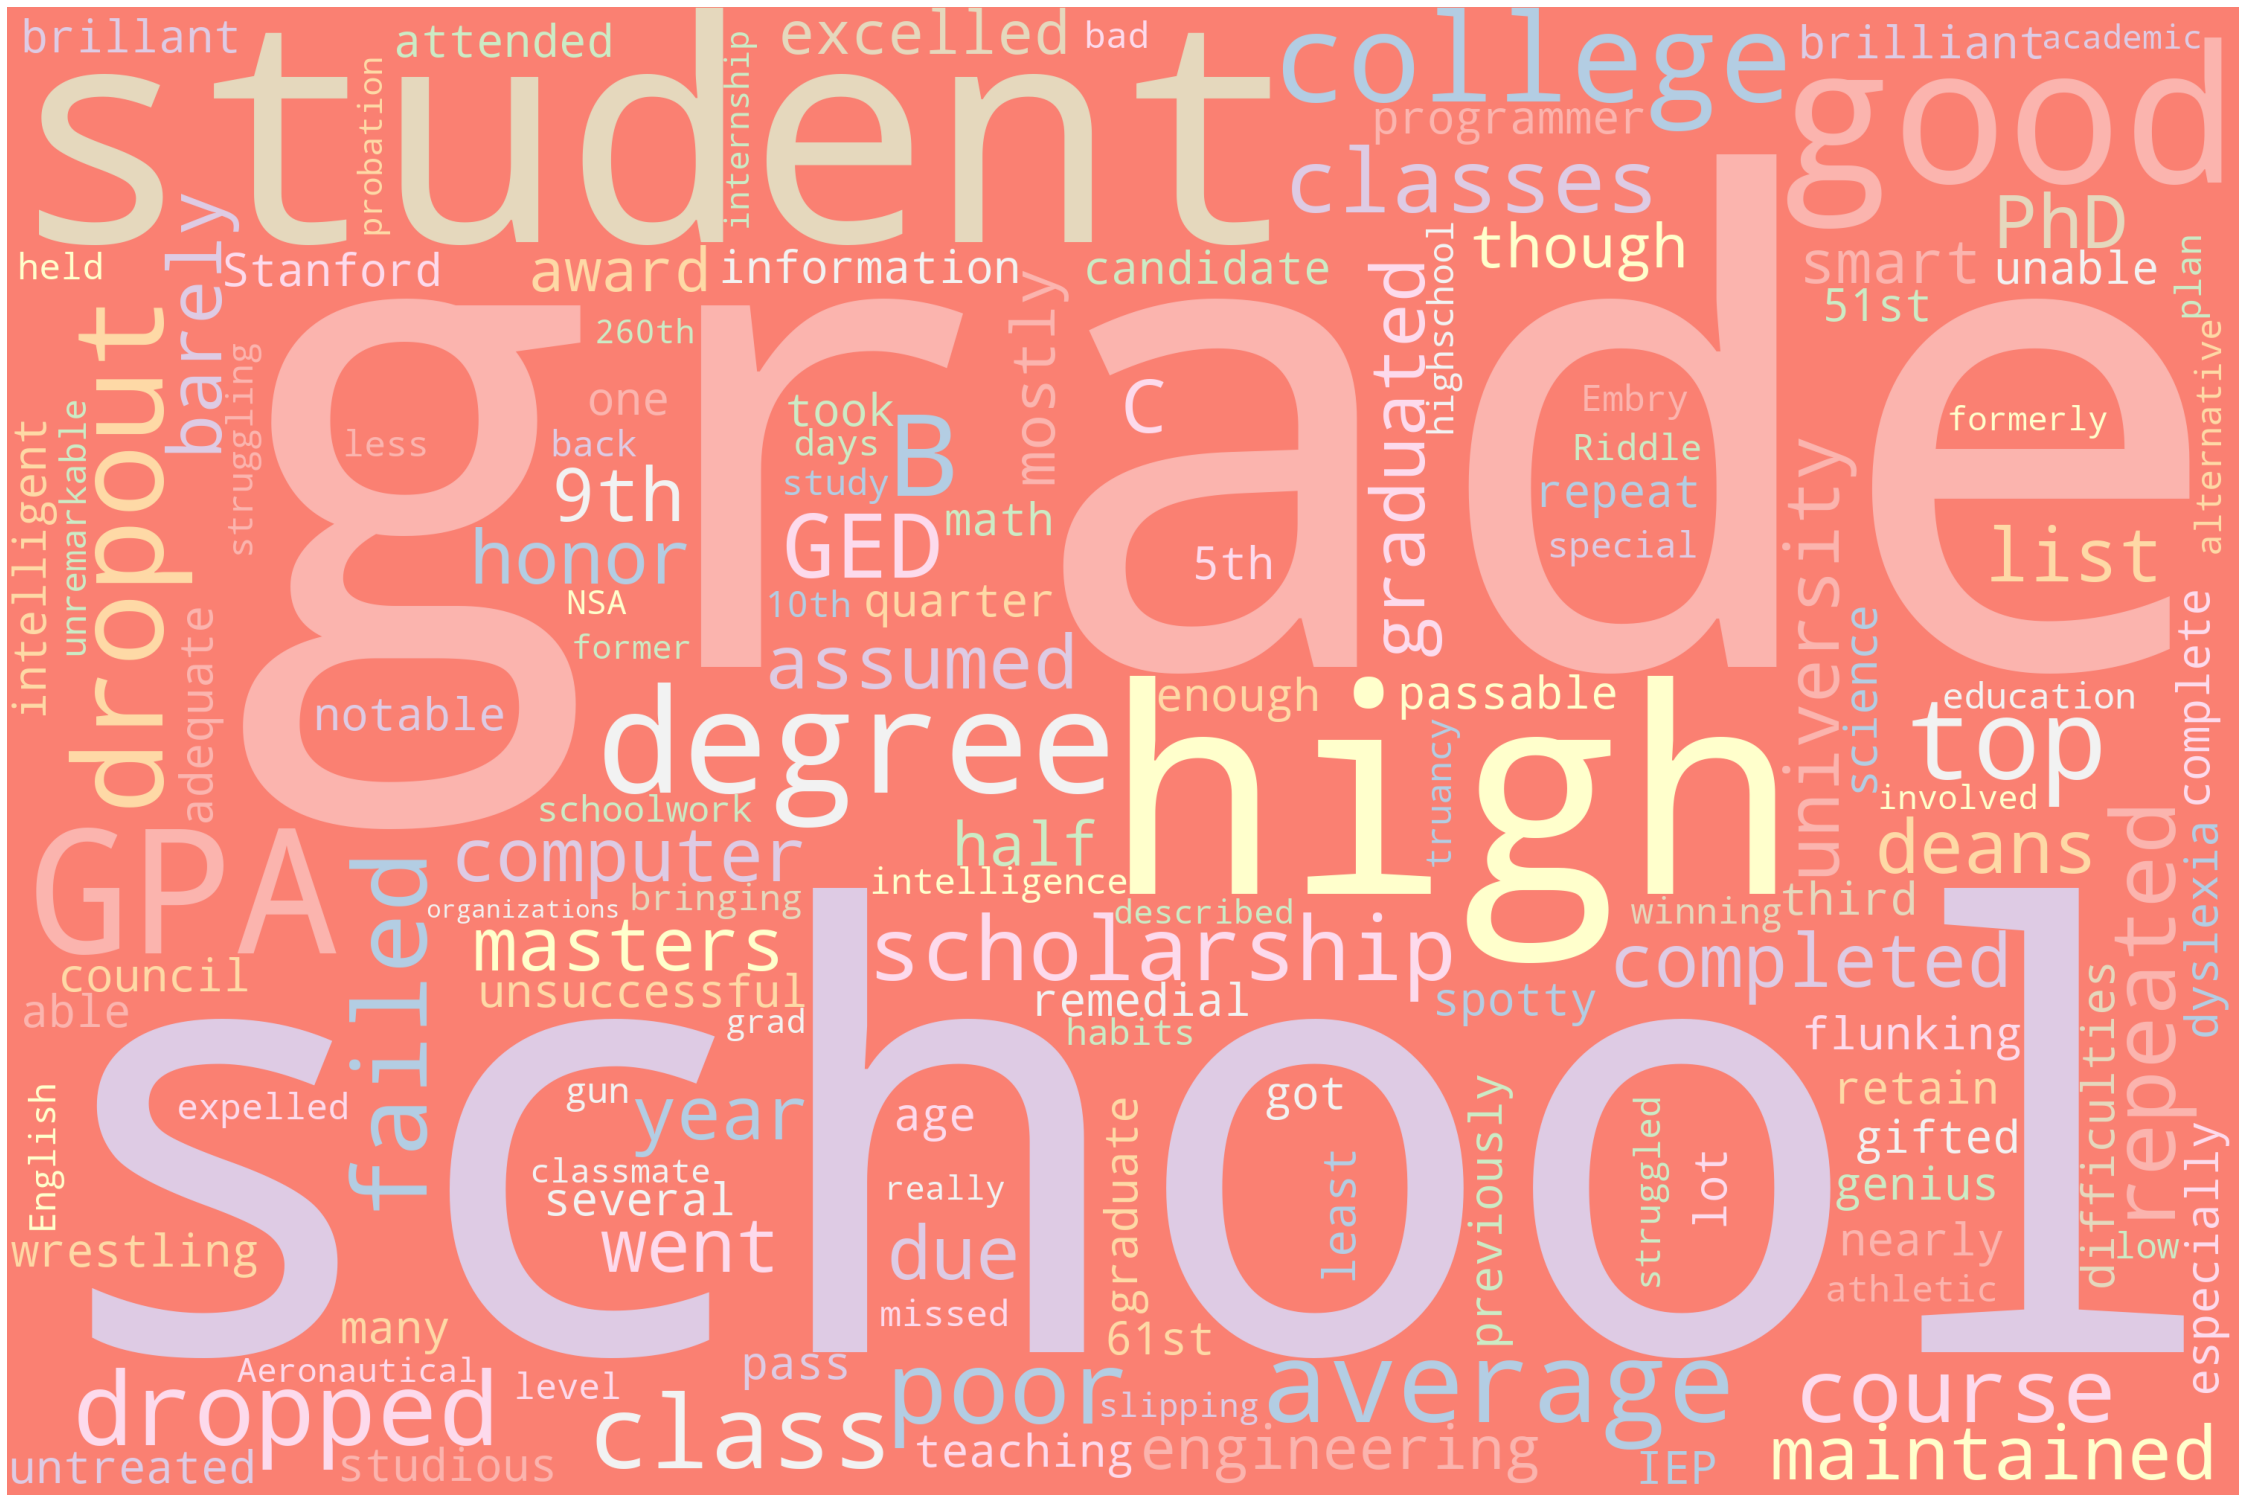

In [241]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudschool = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(testStr)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudschool)

In [250]:
cloudcrime['Community Involvement Specified'] =cloudcrime['Community Involvement Specified'].astype(str)
wordcloud2 = cloudcrime['Community Involvement Specified'].tolist()
print(wordcloud2)

['formerly an altar boy and Eagle Scout', 'nan', 'school board member, director of the local Boy Scout troop, hunted with friends', 'nan', 'part of Black groups', 'nan', 'varsity sports in high school, no involvement as an adult', 'church', 'Cub Scouts, band', 'nan', 'former Sunday School teacher, no recent involvement', 'neighborhood community', 'nan', 'boxing tournaments', 'nan', 'nan', 'former church member, became reclusive', 'nan', 'nan', 'nan', 'friendly with customers, engaged in college classes, joined Alcoholics Anonymous', 'nan', 'nan', 'nan', 'formerly volunteered rescuing birds, became reclusive', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'involved in physics department, regularly went to bars', 'nan', 'nice neighbor, regularly went to restaurants and talked to the staff and customers, participated in martial arts competitions', 'nan', 'nan', 'nan', 'church, gambling at a card room', 'nan', 'nan', 'nan', 

In [251]:
for i in wordcloud2:
    wordcloud2.remove('nan')
cleanedwordcloud2 = [x for x in wordcloud2 if x!= 'nan']
print(cleanedwordcloud2)   
communitystring = ' '
for x in cleanedwordcloud2:
    communitystring += ' '+ x
print(communitystring)


['formerly an altar boy and Eagle Scout', 'school board member, director of the local Boy Scout troop, hunted with friends', 'part of Black groups', 'varsity sports in high school, no involvement as an adult', 'church', 'Cub Scouts, band', 'former Sunday School teacher, no recent involvement', 'neighborhood community', 'boxing tournaments', 'former church member, became reclusive', 'friendly with customers, engaged in college classes, joined Alcoholics Anonymous', 'formerly volunteered rescuing birds, became reclusive', 'involved in physics department, regularly went to bars', 'nice neighbor, regularly went to restaurants and talked to the staff and customers, participated in martial arts competitions', 'church, gambling at a card room', 'involved in neighborhood, environmental causes, local politics', 'therapy group', 'church', 'church', 'involved in neighborhood community', 'band', 'church, youth group volunteering', 'school events', 'school events', 'helpful in neighborhood', 'Boy S

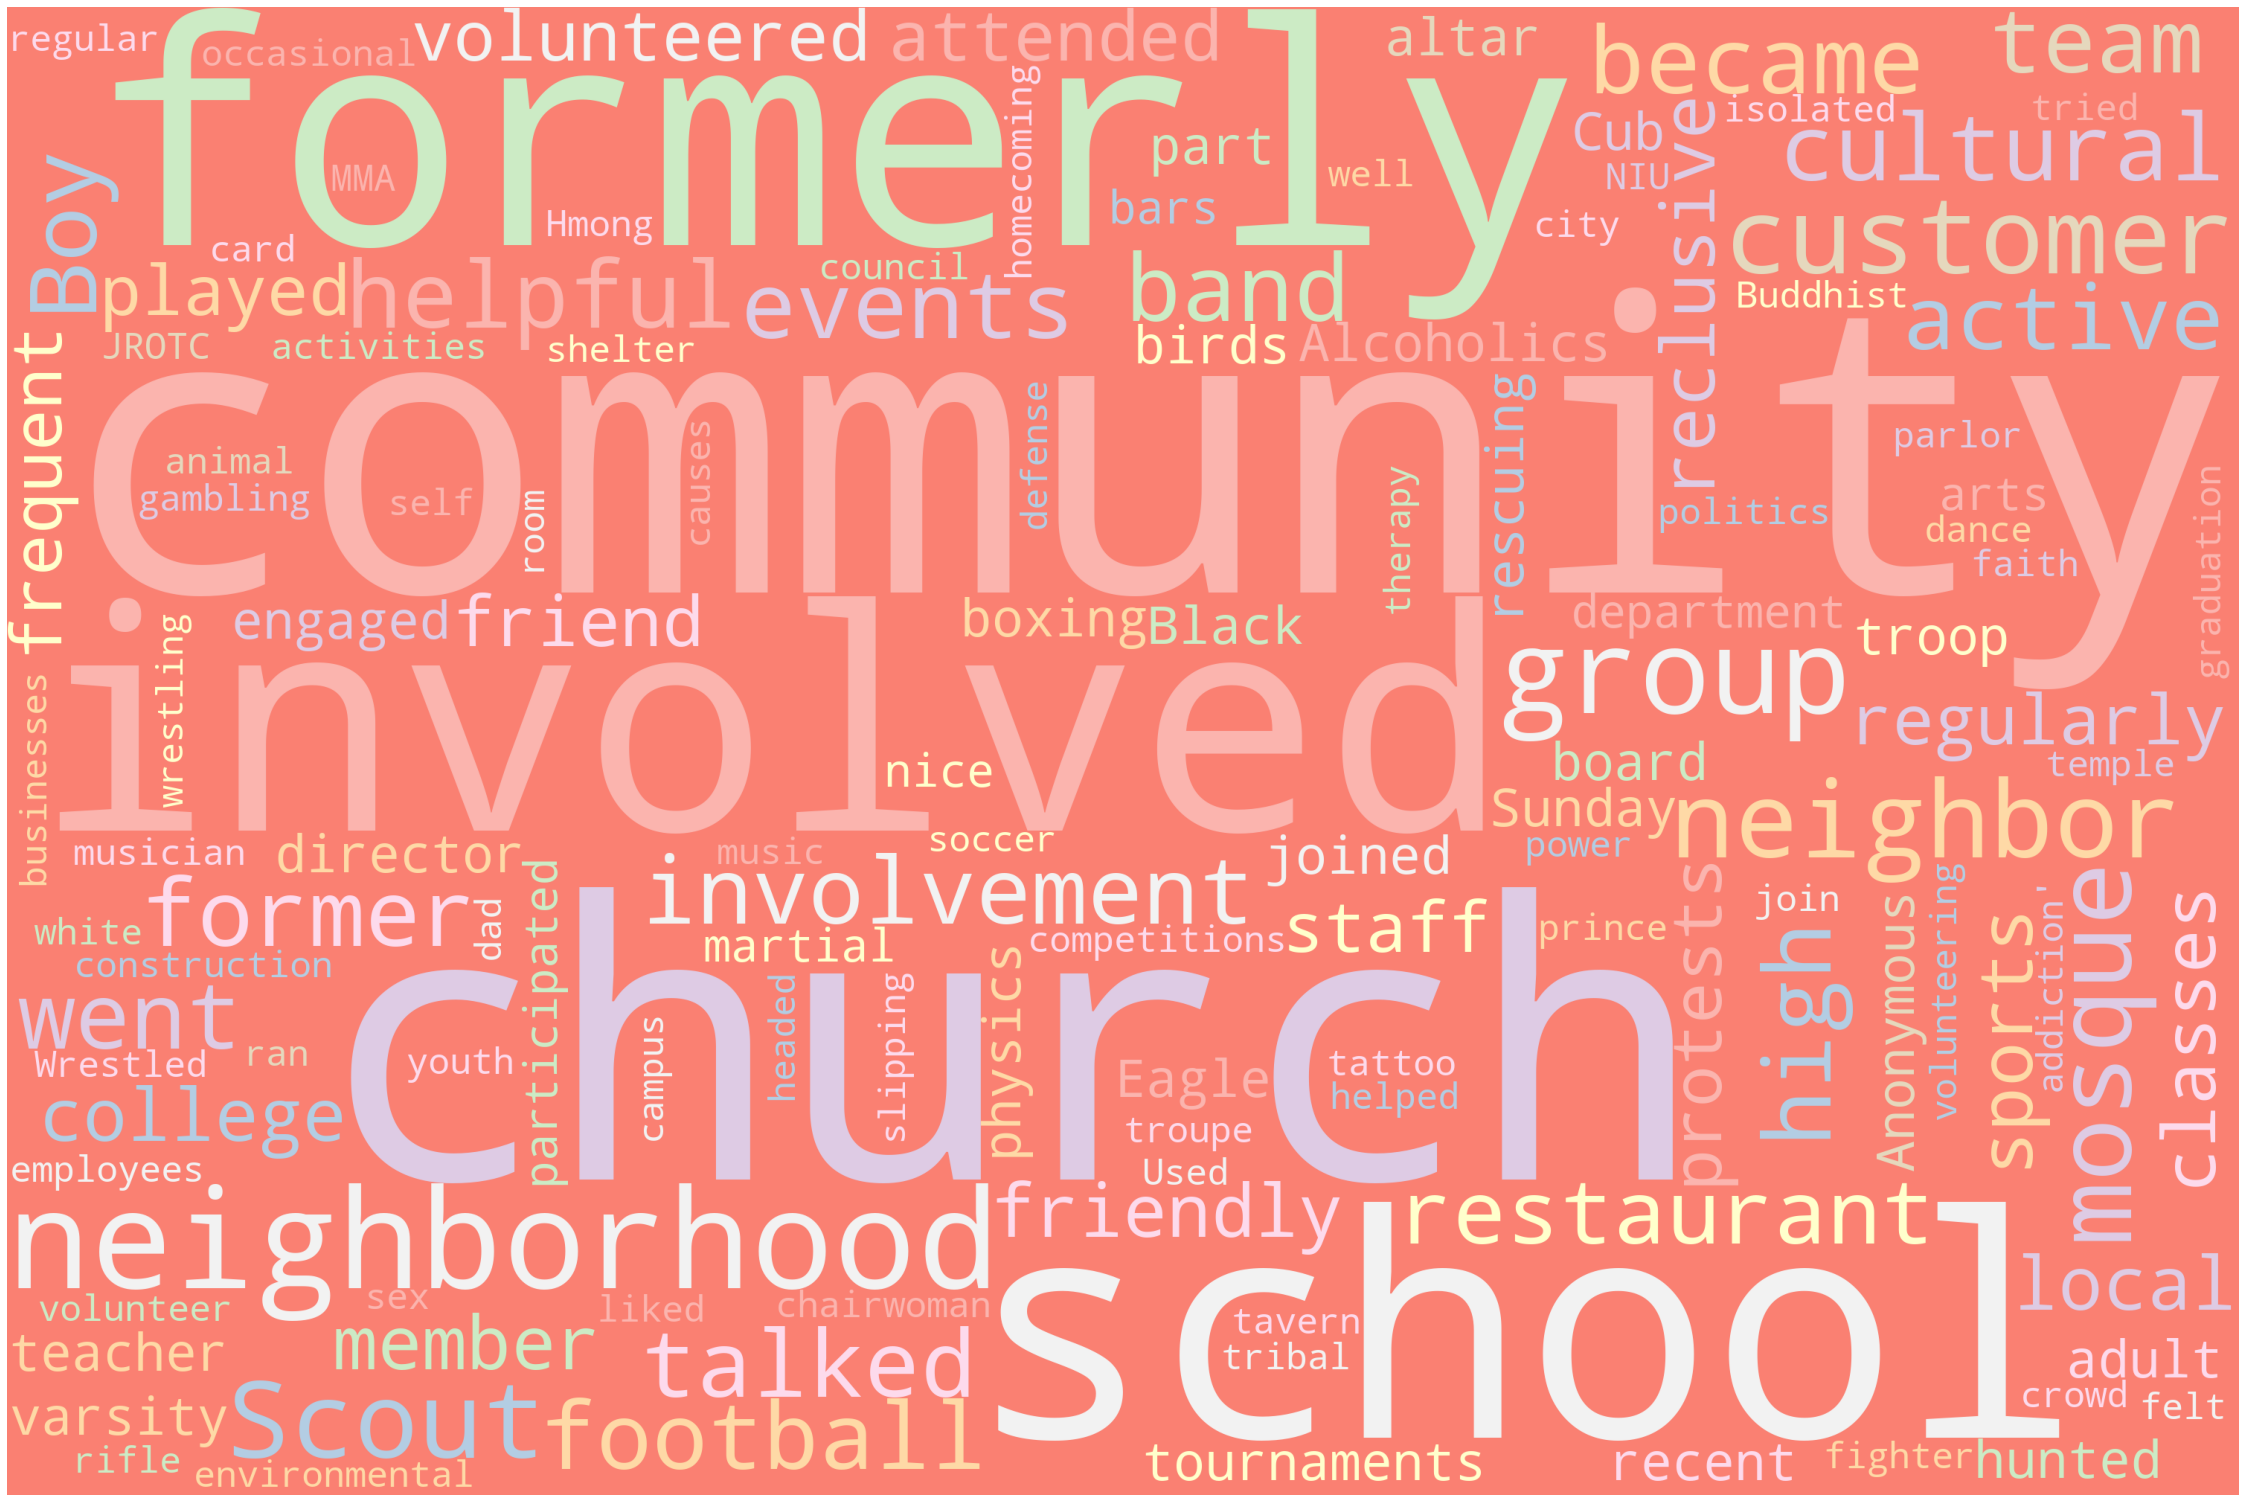

In [249]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudcommunity = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(communitystring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudcommunity)

In [252]:
cloudcrime['Signs of Crisis Expanded'] =cloudcrime['Signs of Crisis Expanded'].astype(str)
wordcloud3 = cloudcrime['Signs of Crisis Expanded'].tolist()
print(wordcloud3)

["A few months before the shooting, he saw a psychiatrist for anger issues, inability to complete his schoolwork, and difficulty handling his parents' divorce. He mentioned a fantasy about going up on top of the tower and shooting people. The psychiatrist noted his rapid mood swings and overwhelming periods of hostility with little provocation.", "A few years before the shooting, he became obsessed with famous murderers and alarmed his classmates with his views. His obsession with murderers began after JFK was assassinated - he had been Smith's hero.", 'He stopped talking to his friends in the months leading up to the shooting. He only ate canned food because he was paranoid that someone was going to poison him and he thought someone had tapped his telephone line. He felt persecuted by coworkers and bosses, a carpool group which criticized his driving, and his neighbors who he thought burned leaves just to upset him.\xa0', 'nan', 'In the days before the shooting, he was paranoid that "

In [253]:
for i in wordcloud3:
    wordcloud3.remove('nan')
cleanedwordcloud3 = [x for x in wordcloud3 if x!= 'nan']
print(cleanedwordcloud3)   
crisisstring = ' '
for x in cleanedwordcloud3:
    crisisstring += ' '+ x
print(crisisstring)


["A few months before the shooting, he saw a psychiatrist for anger issues, inability to complete his schoolwork, and difficulty handling his parents' divorce. He mentioned a fantasy about going up on top of the tower and shooting people. The psychiatrist noted his rapid mood swings and overwhelming periods of hostility with little provocation.", "A few years before the shooting, he became obsessed with famous murderers and alarmed his classmates with his views. His obsession with murderers began after JFK was assassinated - he had been Smith's hero.", 'He stopped talking to his friends in the months leading up to the shooting. He only ate canned food because he was paranoid that someone was going to poison him and he thought someone had tapped his telephone line. He felt persecuted by coworkers and bosses, a carpool group which criticized his driving, and his neighbors who he thought burned leaves just to upset him.\xa0', 'In the days before the shooting, he was paranoid that "the man

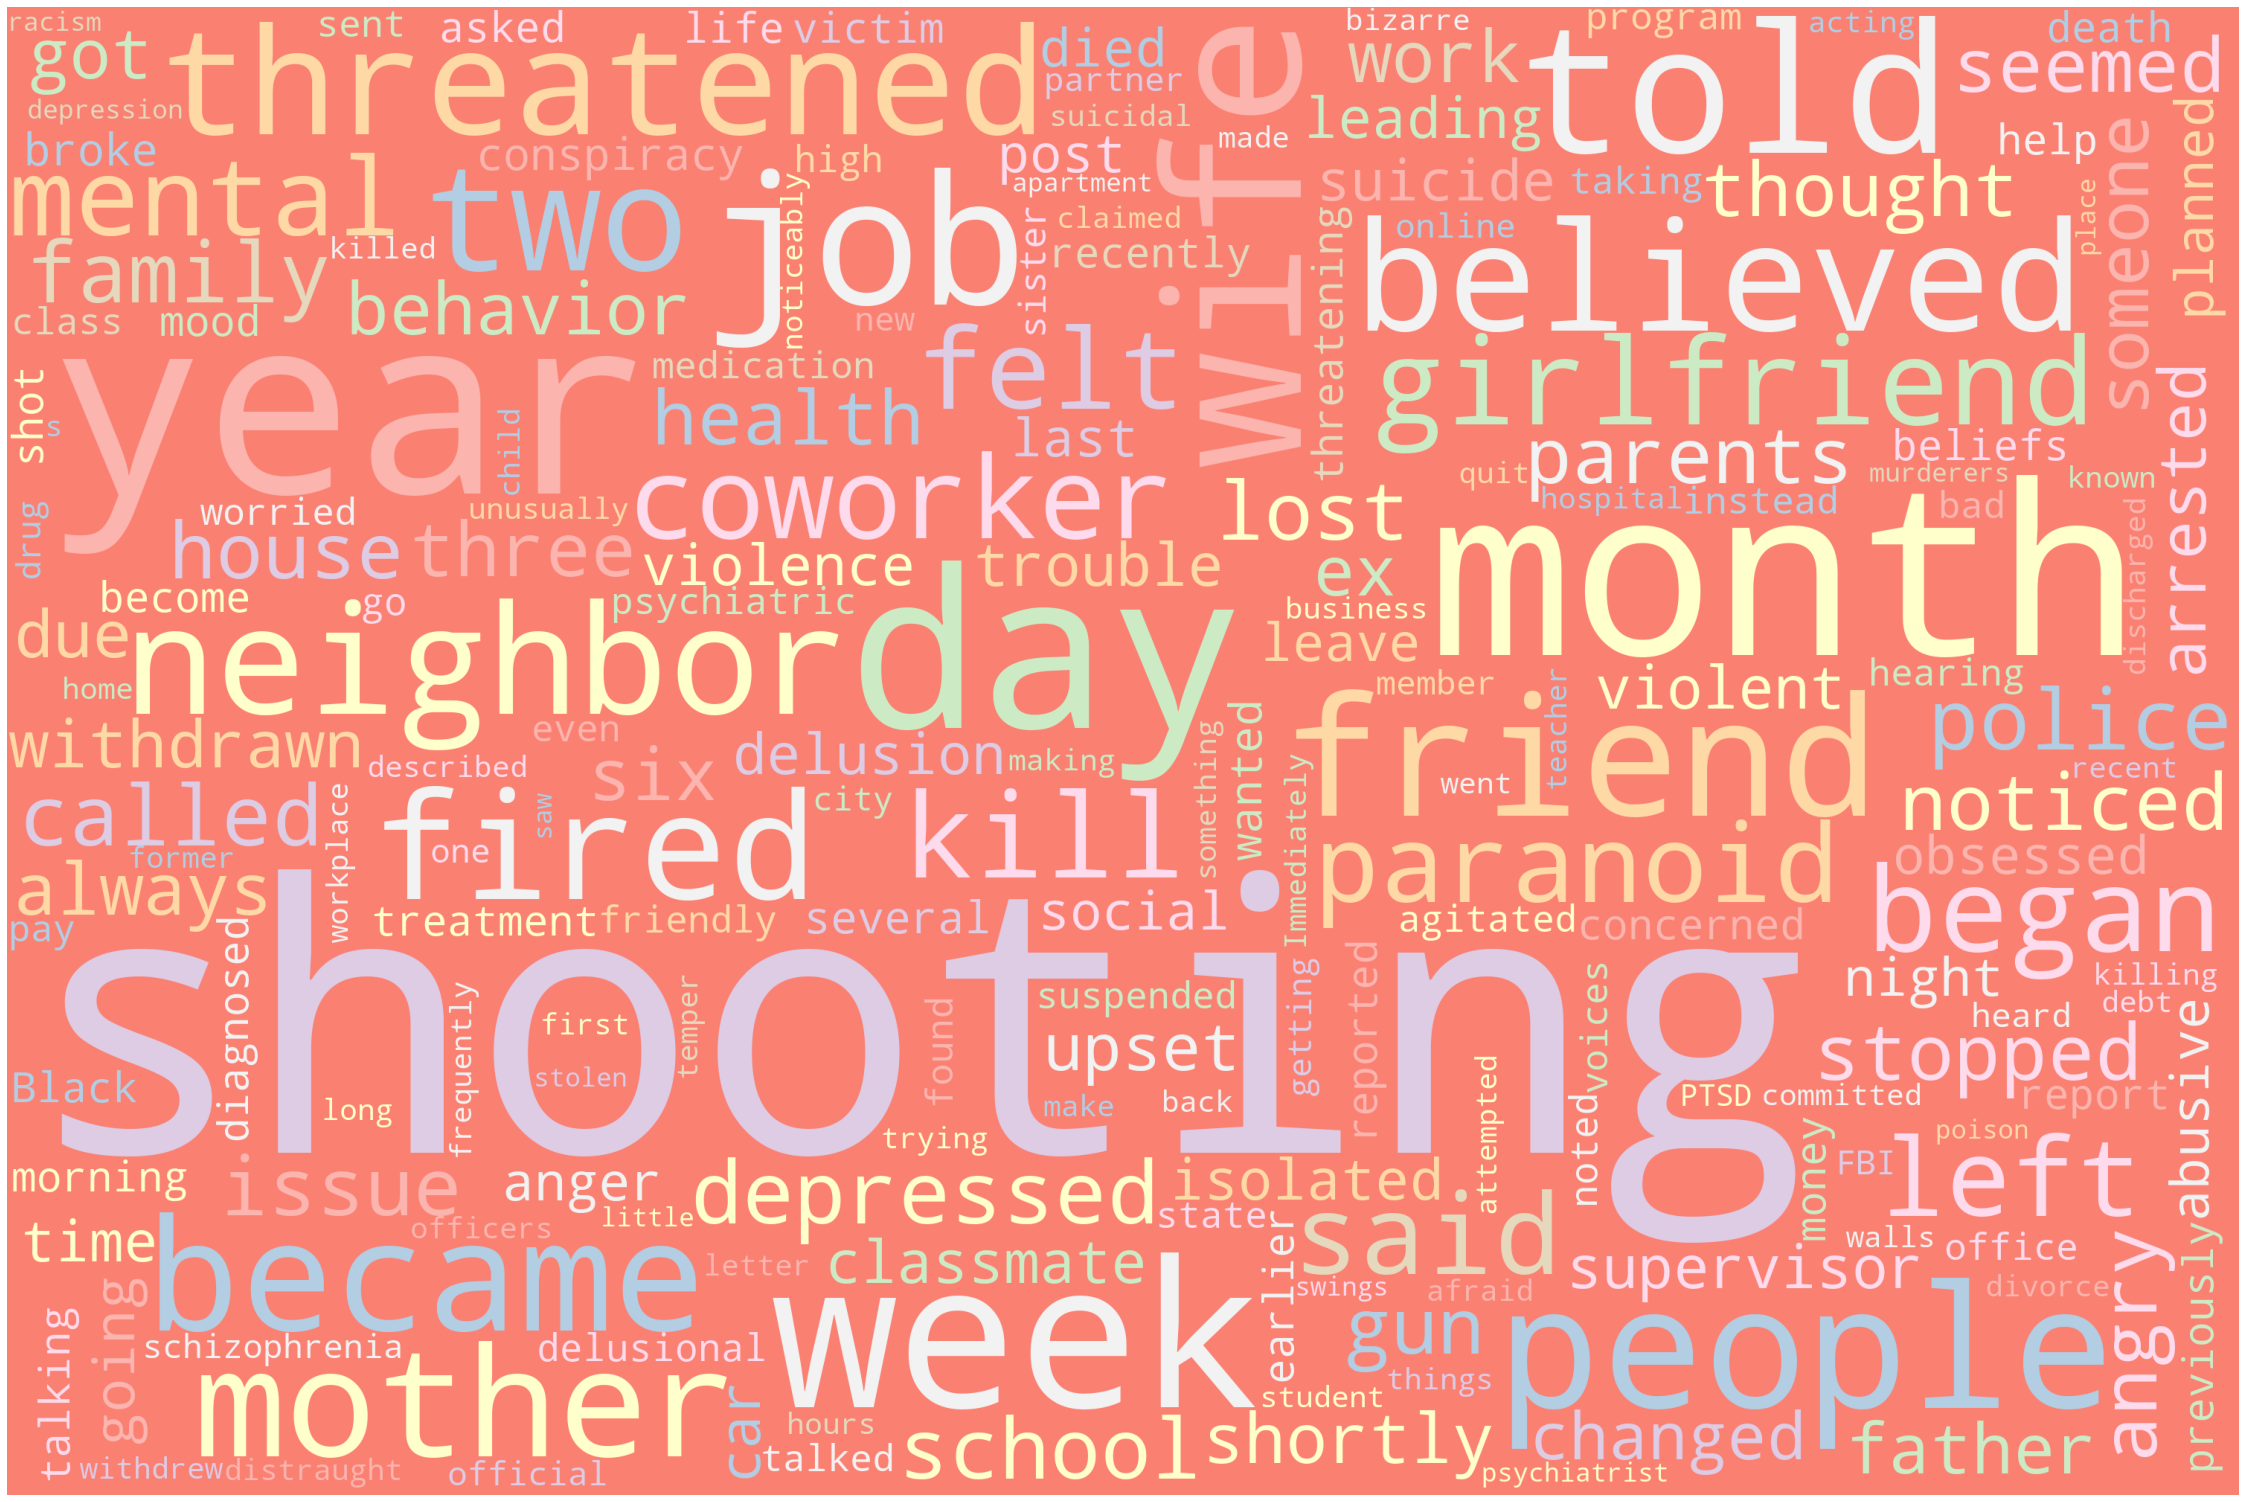

In [254]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudcrisis = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(crisisstring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudcrisis)

History of Physical Altercations or Bullying

In [243]:
historyyes = (crime3['History of Physical Altercations'] == '1').sum()
historyno = (crime3['History of Physical Altercations'] == '0').sum()
historyobjects = (crime3['History of Physical Altercations'] == '2').sum()
bulliedyes = (crime3['Bullied'] == '1').sum()
bulliedno = (crime3['Bullied'] == '0').sum()


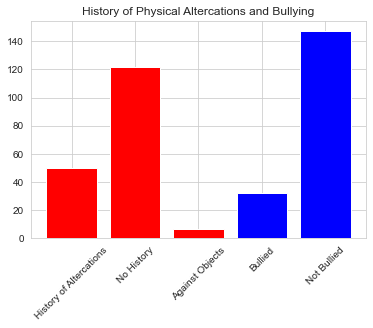

In [245]:
physicalaltercations = {'History of Altercations':historyyes, 'No History':historyno,'Against Objects':historyobjects, 'Bullied':bulliedyes, 'Not Bullied':bulliedno}
plt.bar(list(physicalaltercations.keys()),list(physicalaltercations.values()), color=['red', 'red', 'red', 'blue', 'blue'])
plt.xticks(rotation=45)
plt.title("History of Physical Altercations and Bullying")
plt.show()

In [47]:
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("0", "No Evidence")
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("1", "Racism")
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("2", "Misogyny")
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("3", "Homophobia")
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("4", "Religious Hatred")

In [48]:
none = (crime['Known Prejudices\xa0']=="No Evidence").sum()
racism = (crime['Known Prejudices\xa0']=="Racism").sum()
misogyny = (crime['Known Prejudices\xa0']=="Misogyny").sum()
homophobia = (crime['Known Prejudices\xa0']=="Homophobia").sum()
religiousHate = (crime['Known Prejudices\xa0']=="Religious Hatred").sum()

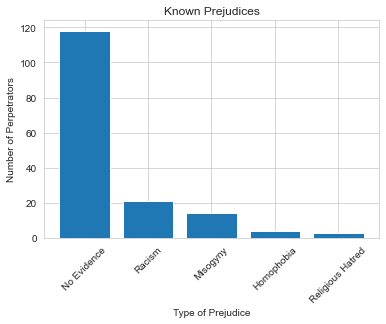

In [49]:
crime2 = crime[crime['Known Prejudices\xa0'].notna()]
x = crime2["Known Prejudices\xa0"]
dict = {'No Evidence':none, 'Racism':racism,'Misogyny':misogyny,'Homophobia':homophobia, 'Religious Hatred':religiousHate}
plt.bar(list(dict.keys()),list(dict.values()) )
plt.title("Known Prejudices")
plt.xticks(rotation=45)
plt.ylabel("Number of Perpetrators")
plt.xlabel("Type of Prejudice")
plt.show()

In [50]:
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("0", "No Evidence")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("1", "Recent break-up")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("2", "Employment stressor")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("3", "Economic stressor")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("4", "Family issue")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("5", "Legal issue")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("6", "Other")
#crime['Recent or Ongoing Stressor']

In [51]:
none = (crime['Recent or Ongoing Stressor']=="No Evidence").sum()
breakup = (crime['Recent or Ongoing Stressor']=="Recent break-up").sum()
employment = (crime['Recent or Ongoing Stressor']=="Employment stressor").sum()
economic = (crime['Recent or Ongoing Stressor']=="Economic stressor").sum()
family = (crime['Recent or Ongoing Stressor']=="Family issue").sum()
legal = (crime['Recent or Ongoing Stressor']=="Legal issue").sum()
other = (crime['Recent or Ongoing Stressor']=="Other").sum()


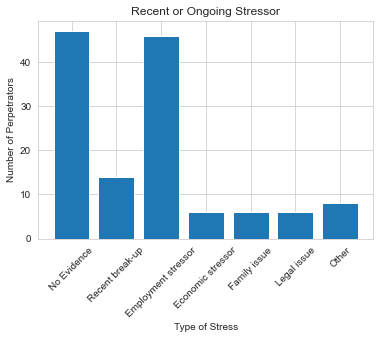

In [52]:
crime2 = crime[crime['Recent or Ongoing Stressor'].notna()]
x = crime2["Recent or Ongoing Stressor"]
dict = {'No Evidence':none, 'Recent break-up':breakup,'Employment stressor':employment,'Economic stressor':economic, 'Family issue':family,'Legal issue':legal,'Other':other}
plt.bar(list(dict.keys()),list(dict.values()) )
#plt.pie(list(dict.keys()),list(dict.values()) )
plt.title("Recent or Ongoing Stressor")
plt.xticks(rotation=45)
plt.ylabel("Number of Perpetrators")
plt.xlabel("Type of Stress")
plt.show()

In [53]:
crime['Adult Trauma'] = crime['Adult Trauma'].replace("0", "No Evidence")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("1", "Death of a parent causing significant distress")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("2", "Death or loss of a child")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("3", "Death of a family member causing significant distress")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("4", "Trauma from war")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("5", "Traumatic accident")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("6", "Other")
#crime['Adult Trauma']

In [54]:
none = (crime['Adult Trauma']=="No Evidence").sum()
parent = (crime['Adult Trauma']=="Death of a parent causing significant distress").sum()
child = (crime['Adult Trauma']=="Death or loss of a child").sum()
family = (crime['Adult Trauma']=="Death of a family member causing significant distress").sum()
war = (crime['Adult Trauma']=="Trauma from war").sum()
accident = (crime['Adult Trauma']=="Traumatic accident").sum()
other = (crime['Adult Trauma']=="Other").sum()
traumalist = (none,parent, child,family,war,accident, other)


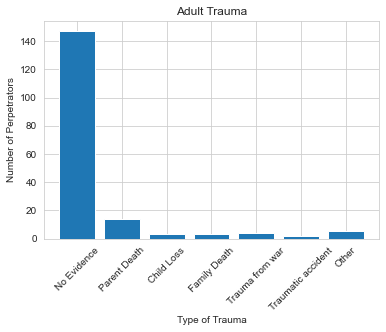

In [55]:
crime2 = crime[crime['Adult Trauma'].notna()]
x = crime2["Adult Trauma"]
dict = {'No Evidence':none, 'Parent Death':parent,'Child Loss':child,'Family Death':family, 'Trauma from war':war,'Traumatic accident':accident,'Other':other}
plt.bar(list(dict.keys()),list(dict.values()) )
#plt.pie(list(dict.keys()),list(dict.values()) )
plt.title("Adult Trauma")
plt.xticks(rotation=45)
plt.ylabel("Number of Perpetrators")
plt.xlabel("Type of Trauma")
plt.show()


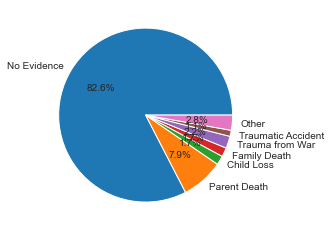

In [56]:
traumalabels = ('No Evidence', 'Parent Death','Child Loss','Family Death','Trauma from War','Traumatic Accident','Other')
plt.pie(traumalist,labels = traumalabels, autopct='%1.1f%%')
plt.show()

In [57]:
crime['Race'] = crime['Race'].replace("0", "White")
crime['Race'] = crime['Race'].replace("1", "Black")
crime['Race'] = crime['Race'].replace("2", "Latinx")
crime['Race'] = crime['Race'].replace("3", "Asian")
crime['Race'] = crime['Race'].replace("4", "Middle Eastern")
crime['Race'] = crime['Race'].replace("5", "Native American")
crime['Race'] = crime['Race'].replace("6", "Other")

In [58]:
white = (crime['Race']=="White").sum()
black = (crime['Race']=="Black").sum()
latinx = (crime['Race']=="Latinx").sum()
asian = (crime['Race']=="Asian").sum()
middleEastern = (crime['Race']=="Middle Eastern").sum()
nativeAmerican = (crime['Race']=="Native American").sum()
other = (crime['Race']=="Other").sum()


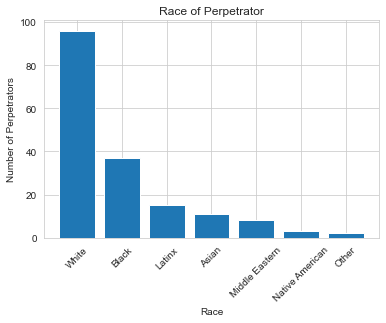

In [59]:
crime2 = crime[crime['Race'].notna()]
x = crime2["Race"]
dict = {'White':white, 'Black':black,'Latinx':latinx,'Asian':asian, 'Middle Eastern':middleEastern,'Native American':nativeAmerican,'Other':other}
plt.bar(list(dict.keys()),list(dict.values()) )

plt.title("Race of Perpetrator")
plt.xticks(rotation=45)
plt.ylabel("Number of Perpetrators")
plt.xlabel("Race")
plt.show()

In [60]:
#1966-2022
crime3['Race'] = crime['Race'].replace("0", "White")
crime3['Race'] = crime['Race'].replace("1", "Black")
crime3['Race'] = crime['Race'].replace("2", "Latinx")
crime3['Race'] = crime['Race'].replace("3", "Asian")
crime3['Race'] = crime['Race'].replace("4", "Middle Eastern")
crime3['Race'] = crime['Race'].replace("5", "Native American")
crime3['Race'] = crime['Race'].replace("6", "Other")

In [61]:
firstDecade = crime3[(crime3["Year"] >= 1966) & (crime3["Year"] <= 1976)]
secondDecade = crime3[(crime3["Year"] >= 1977) & (crime3["Year"] <= 1987)]
thirdDecade = crime3[(crime3["Year"] >= 1988) & (crime3["Year"] <= 1998)]
fourthDecade = crime3[(crime3["Year"] >= 1999) & (crime3["Year"] <= 2009)]
fifthDecade = crime3[(crime3["Year"] >= 2010) & (crime3["Year"] <= 2018)]
sixthDecade = crime3[(crime3["Year"] >= 2019) & (crime3["Year"] <= 2022)]

In [62]:
white1 = (firstDecade['Race']=="White").sum()
black1 = (firstDecade['Race']=="Black").sum()
latinx1 = (firstDecade['Race']=="Latinx").sum()
asian1 = (firstDecade['Race']=="Asian").sum()
middleEastern1 = (firstDecade['Race']=="Middle Eastern").sum()
nativeAmerican1 = (firstDecade['Race']=="Native American").sum()
other1 = (firstDecade['Race']=="Other").sum()

In [63]:
white2 = (secondDecade['Race']=="White").sum()
black2 = (secondDecade['Race']=="Black").sum()
latinx2 = (secondDecade['Race']=="Latinx").sum()
asian2 = (secondDecade['Race']=="Asian").sum()
middleEastern2 = (secondDecade['Race']=="Middle Eastern").sum()
nativeAmerican2 = (secondDecade['Race']=="Native American").sum()
other2 = (secondDecade['Race']=="Other").sum()

In [64]:
white3 = (thirdDecade['Race']=="White").sum()
black3 = (thirdDecade['Race']=="Black").sum()
latinx3 = (thirdDecade['Race']=="Latinx").sum()
asian3 = (thirdDecade['Race']=="Asian").sum()
middleEastern3 = (thirdDecade['Race']=="Middle Eastern").sum()
nativeAmerican3 = (thirdDecade['Race']=="Native American").sum()
other3 = (thirdDecade['Race']=="Other").sum()

In [65]:
white4 = (fourthDecade['Race']=="White").sum()
black4 = (fourthDecade['Race']=="Black").sum()
latinx4 = (fourthDecade['Race']=="Latinx").sum()
asian4 = (fourthDecade['Race']=="Asian").sum()
middleEastern4 = (fourthDecade['Race']=="Middle Eastern").sum()
nativeAmerican4 = (fourthDecade['Race']=="Native American").sum()
other4 = (fourthDecade['Race']=="Other").sum()

In [66]:
white5 = (fifthDecade['Race']=="White").sum()
black5 = (fifthDecade['Race']=="Black").sum()
latinx5 = (fifthDecade['Race']=="Latinx").sum()
asian5 = (fifthDecade['Race']=="Asian").sum()
middleEastern5 = (fifthDecade['Race']=="Middle Eastern").sum()
nativeAmerican5 = (fifthDecade['Race']=="Native American").sum()
other5 = (fifthDecade['Race']=="Other").sum()

In [67]:
white6 = (sixthDecade['Race']=="White").sum()
black6 = (sixthDecade['Race']=="Black").sum()
latinx6 = (sixthDecade['Race']=="Latinx").sum()
asian6 = (sixthDecade['Race']=="Asian").sum()
middleEastern6 = (sixthDecade['Race']=="Middle Eastern").sum()
nativeAmerican6 = (sixthDecade['Race']=="Native American").sum()
other6 = (sixthDecade['Race']=="Other").sum()

In [68]:
perpetratorRace = {'Group' : ['1966 - 1976', '1966 - 1976', '1966 - 1976', '1966 - 1976','1966 - 1976', '1966 - 1976', '1966 - 1976', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2019-2022', '2019-2022', '2019-2022','2019-2022', '2019-2022', '2019-2022', '2019-2022'],
                'Category': ['White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other'],
                'Value' : [white1, black1, latinx1, asian1, middleEastern1, nativeAmerican1, other1, white2, black2, latinx2, asian2, middleEastern2, nativeAmerican2, other2, white3, black3, latinx3, asian3, middleEastern3, nativeAmerican3, other3, white4, black4, latinx4, asian4, middleEastern4, nativeAmerican4, other4, white5, black5, latinx5, asian5, middleEastern5, nativeAmerican5, other5, white6, black6, latinx6, asian6, middleEastern6, nativeAmerican6, other6]}   

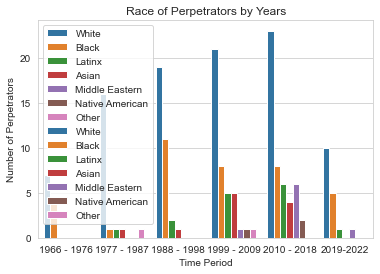

In [85]:
sns.set_style("whitegrid")
#sns.barplot(x='Group', y='Value', hue='Category', data= perpetratorRace)

plt.title("Race of Perpetrators by Years")  #Change 2010-2018, and 2019-2022
plt.xlabel("Time Period")
plt.ylabel("Number of Perpetrators")
ax = sns.barplot(x='Group', y='Value', hue='Category', data= perpetratorRace)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()


In [86]:
victims = pd.read_csv("victims.csv", sep=",")
victims.head()

,Case #,Shooter Last Name,Shooter First Name,Full Date,Victim Name,Age,Gender,Race,Knew Shooter,"If Known, Relationship to Shooter",...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,Whitman,Charles,8/1/1966,"Kathleen ""Kathy"" Whitman",23.0,1.0,0.0,1.0,wife,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Whitman,Charles,8/1/1966,Margaret Whitman,43.0,1.0,0.0,1.0,mother,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Whitman,Charles,8/1/1966,"Martin ""Mark"" Gabour",16.0,0.0,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Whitman,Charles,8/1/1966,Marguerite Lamport,45.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Whitman,Charles,8/1/1966,Edna Elizabeth Townsley,51.0,1.0,0.0,2.0,employee on campus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
victims['Full Date'] = victims['Full Date'].astype(str)

In [88]:
victims['Date'] = victims['Full Date'].str[-4:]
victims = victims[:-143]

In [89]:
victims['Date']

0       1966
1       1966
2       1966
3       1966
4       1966
        ... 
1262    2022
1263    2022
1264    2022
1265    2022
1266    2022
Name: Date, Length: 1267, dtype: object

In [ ]:
victims['Race'] = pd.to_numeric(victims['Race'], errors='coerce').convert_dtypes() 
victims['Date'] = pd.to_numeric(victims['Date'])

In [ ]:
victims2 = victims[victims['Race'].notna()]


In [ ]:

#victims2['Race'] = victims2['Race'].replace("0", "White")
#victims2['Race'] = victims2['Race'].replace("1", "Black")
#victims2['Race'] = victims2['Race'].replace("2", "Latinx")
#victims2['Race'] = victims2['Race'].replace("3", "Asian")
#victims2['Race'] = victims2['Race'].replace("4", "Middle Eastern")
#victims2['Race'] = victims2['Race'].replace("5", "Native American")
#victims2['Race'] = victims2['Race'].replace("6", "Other")

In [ ]:
firstdecade = victims2[(victims2["Date"] >= 1966) & (victims2["Date"] <= 1976)]
seconddecade = victims2[(victims2["Date"] >= 1977) & (victims2["Date"] <= 1987)]
thirddecade = victims2[(victims2["Date"] >= 1988) & (victims2["Date"] <= 1998)]
fourthdecade = victims2[(victims2["Date"] >= 1999) & (victims2["Date"] <= 2009)]
fifthdecade = victims2[(victims2["Date"] >= 2010) & (victims2["Date"] <= 2018)]
sixthdecade = victims2[(victims2["Date"] >= 2019) & (victims2["Date"] <= 2022)]

In [ ]:
white1 = (firstdecade['Race']=="0").sum()
black1 = (firstdecade['Race']=="1").sum()
latinx1 = (firstdecade['Race']=="2").sum()
asian1 = (firstdecade['Race']=="3").sum()
middleEastern1 = (firstdecade['Race']=="4").sum()
nativeAmerican1 = (firstdecade['Race']=="5").sum()
other1 = (firstdecade['Race']=="6").sum()

In [ ]:
white2 = (seconddecade['Race']=="0").sum()
black2 = (seconddecade['Race']=="1").sum()
latinx2 = (seconddecade['Race']=="2").sum()
asian2 = (seconddecade['Race']=="3").sum()
middleEastern2 = (seconddecade['Race']=="4").sum()
nativeAmerican2 = (seconddecade['Race']=="5").sum()
other2 = (seconddecade['Race']=="6").sum()

In [ ]:
white3 = (thirddecade['Race']=="0").sum()
black3 = (thirddecade['Race']=="1").sum()
latinx3 = (thirddecade['Race']=="2").sum()
asian3 = (thirddecade['Race']=="3").sum()
middleEastern3 = (thirddecade['Race']=="4").sum()
nativeAmerican3 = (thirddecade['Race']=="5").sum()
other3 = (thirddecade['Race']=="6").sum()

In [ ]:
white4 = (fourthdecade['Race']=="0").sum()
black4 = (fourthdecade['Race']=="1").sum()
latinx4 = (fourthdecade['Race']=="2").sum()
asian4 = (fourthdecade['Race']=="3").sum()
middleEastern4 = (fourthdecade['Race']=="4").sum()
nativeAmerican4 = (fourthdecade['Race']=="5").sum()
other4 = (fourthdecade['Race']=="6").sum()

In [ ]:
white5 = (fifthdecade['Race']=="0").sum()
black5 = (fifthdecade['Race']=="1").sum()
latinx5 = (fifthdecade['Race']=="2").sum()
asian5 = (fifthdecade['Race']=="3").sum()
middleEastern5 = (fifthdecade['Race']=="4").sum()
nativeAmerican5 = (fifthdecade['Race']=="5").sum()
other5 = (fifthdecade['Race']=="6").sum()

In [ ]:
white6 = (sixthdecade['Race']=="0").sum()
black6 = (sixthdecade['Race']=="1").sum()
latinx6 = (sixthdecade['Race']=="2").sum()
asian6 = (sixthdecade['Race']=="3").sum()
middleEastern6 = (sixthdecade['Race']=="4").sum()
nativeAmerican6 = (sixthdecade['Race']=="5").sum()
other6 = (sixthdecade['Race']=="6").sum()

In [ ]:
victimRace = {'Group' : ['1966 - 1976', '1966 - 1976', '1966 - 1976', '1966 - 1976','1966 - 1976', '1966 - 1976', '1966 - 1976', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2010 - 2018', '2019-2022', '2019-2022', '2019-2022','2019-2022', '2019-2022', '2019-2022', '2019-2022'],
                'Category': ['White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other'],
                'Value' : [white1, black1, latinx1, asian1, middleEastern1, nativeAmerican1, other1, white2, black2, latinx2, asian2, middleEastern2, nativeAmerican2, other2, white3, black3, latinx3, asian3, middleEastern3, nativeAmerican3, other3, white4, black4, latinx4, asian4, middleEastern4, nativeAmerican4, other4, white5, black5, latinx5, asian5, middleEastern5, nativeAmerican5, other5, white6, black6, latinx6, asian6, middleEastern6, nativeAmerican6, other6]}

sns.set_style("whitegrid")
sns.barplot(x='Group', y='Value', hue='Category', data= victimRace)

plt.title("Race of Victims by Years")  #Change 2010-2018, and 2019-2022
plt.xlabel("Time Period")
plt.ylabel("Number of Victims")
ax = sns.barplot(x='Group', y='Value', hue='Category', data= victimRace)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
firstDecade = crime3[(crime3["Year"] >= 1966) & (crime3["Year"] <= 1976)]
secondDecade = crime3[(crime3["Year"] >= 1977) & (crime3["Year"] <= 1987)]
thirdDecade = crime3[(crime3["Year"] >= 1988) & (crime3["Year"] <= 1998)]
fourthDecade = crime3[(crime3["Year"] >= 1999) & (crime3["Year"] <= 2009)]
fifthDecade = crime3[(crime3["Year"] >= 2010) & (crime3["Year"] <= 2018)]
sixthDecade = crime3[(crime3["Year"] >= 2019) & (crime3["Year"] <= 2022)]

In [ ]:
#Number Killed
#Number Injured
crime3['Number Killed'] = pd.to_numeric(crime3['Number Killed'], errors='coerce').convert_dtypes() 
crime3['Number Injured'] = pd.to_numeric(crime3['Number Injured'], errors='coerce').convert_dtypes() 

In [ ]:
killed1 = sum(firstDecade['Number Killed'])
injured1 = sum(firstDecade['Number Injured'])
killed2 = sum(secondDecade['Number Killed'])
injured2 = sum(secondDecade['Number Injured'])
killed3 = sum(thirdDecade['Number Killed'])
injured3 = sum(thirdDecade['Number Injured'])
killed4 = sum(fourthDecade['Number Killed'])
injured4 = sum(fourthDecade['Number Injured'])
killed5 = sum(fifthDecade['Number Killed'])
injured5 = sum(fifthDecade['Number Injured'])
killed6 = sum(sixthDecade['Number Killed'])
injured6 = sum(sixthDecade['Number Injured'])

In [ ]:
victimCounts = {'Group' : ['1966 - 1976', '1966 - 1976', '1977 - 1987', '1977 - 1987', '1988 - 1998', '1988 - 1998', '1999 - 2009', '1999 - 2009', '2010 - 2018', '2010 - 2018', '2019-2022', '2019-2022'],
                'Category': ['Killed', 'Injured', 'Killed', 'Injured', 'Killed', 'Injured', 'Killed', 'Injured', 'Killed', 'Injured', 'Killed', 'Injured'],
                'Value' : [killed1, injured1, killed2, injured2, killed3, injured3, killed4, injured4, killed5, injured5, killed6, injured6]}

In [ ]:
sns.set_style("whitegrid")
#sns.barplot(x='Group', y='Value', hue='Category', data= victimCounts)

plt.title("Number of Victims by Years")  #Change 2010-2018, and 2019-2022
plt.xlabel("Time Period")
plt.ylabel("Number of Victims")
ax = sns.barplot(x='Group', y='Value', hue='Category', data= victimCounts)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()